<a href="https://colab.research.google.com/github/creepypers/Classification-diabetiques-avec-SVM/blob/main/devoir1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie theorique

## Maximum Margin Classifier

Le maximum margin est la marge optimale entre l’hyperplan (frontière de séparation) et les vecteurs de support, qui sont les points choisis dans chaque classe (données que l’on cherche à séparer) et qui définissent les limites de notre marge. Donc, le maximum margin classifier est l’algorithme qui permet de trouver cet marge pour un hyperplan optimal. **Les vecteurs de support** ce sont des points spécifiques sélectionnés dans nos classes ils servent à déterminer notre maximum margin ; on ne tient pas compte des autres points de nos classes .Elle n’est utile que si les données sont linéairement séparables.

## Gestion de la Non-Linéarité :

Lorsque nos classes ne sont pas séparables par une droite, on applique l’astuce du noyau, qui consiste à rajouter implicitement une dimension à notre plan, qui devient ainsi un espace à
𝑛
n dimensions. On ne calcule jamais les nouvelles coordonnées (𝜙(𝑥𝑖)) de nos vecteurs de support. L’astuce consiste à trouver une fonction de noyau
𝐾(𝑥𝑖,𝑥𝑗) qui est équivalente au produit scalaire des vecteurs transformés :

                          𝐾(𝑥𝑖,𝑥𝑗) = 𝜙(𝑥𝑖)⋅𝜙(𝑥𝑗)

Cela permet de trouver l’hyperplan optimal tout en réduisant très grandement la complexité de calcul.
On calcule le produit scalaire car plus le produit scalaire de deux vecteurs est grand, plus ils se ressemblent, et inversement.

##  Compromis Biais-Variance et C

L’hyperparamètre C définit notre tolérance à l’erreur dans la construction de la marge de notre hyperplan. Plus il est élevé, moins notre système tolère les erreurs et plus la classification est stricte. Les outliers (éléments loin de l’hyperplan) sont moins efficacement gérés : le système y est très sensible, car l’hyperplan est déformé pour s’y adapter, ce qui provoque un biais faible (car il s’ajuste étroitement aux données d’entraînement, y compris les outliers), mais une variance élevée, car sa frontière de décision complexe sera instable et changera beaucoup si l’on modifie légèrement les données, entraînant de l’overfitting.

Moins il est élevé, plus notre système tolère les erreurs et plus la classification est souple. Les outliers sont mieux gérés : le système y est moins sensible, car l’hyperplan n’est pas trop déformé. La variance est faible, car la large marge le rend robuste aux fluctuations des données et il généralisera bien. Mais le biais est élevé, car le modèle est trop simple et tolère trop d’erreurs, même celles qui ne sont pas des outliers, ce qui provoque de l’underfitting.

## Influence du Noyau et γ

Gamma est un hyperparamètre qui décide de la forme de notre frontière de décision. Plus il est élevé, plus les vecteurs de support influencent l’hyperplan et ses voisins, modifiant ainsi sa forme et épousant chaque point de notre classe. On augmente alors le bruit, car les outliers déforment notre frontière. Cela convient aux données complexes et propres, et donne une meilleure précision sur l’entraînement.

Quand il est faible, la frontière est lisse : chaque point affecte une large partie de la frontière, donc elle est plus uniforme. Le modèle est moins sensible au bruit et généralise mieux ; il se prête bien aux données simples ou bruitées. En gros, il indique comment les données doivent être groupées. Une valeur de gamma trop grande sculpte tellement le plan que les vecteurs de support représentent presque la seule base de la classification, et l’algorithme devient biaisé par les données d’apprentissage.

## Évaluation et hyperparametres

La précision désigne le taux de réussite de prédiction positifs de notre modèle. Elle est calculée par le rapport :

                          (𝑉𝑃)/(𝑉𝑃+𝐹𝑃)

Parmi tout ce que le modèle prédit comme positif, la précision indique la part réellement correcte.Plus elle est proche de 1, plus le modèle fait peu d’erreurs de faux positifs.

**Le rappel** désigne le taux de réussite dans la prédiction des cas positifs par rapport au total de cas positifs réels de notre modèle. Il est calculé par le rapport :

                            𝑉𝑃/(𝑉𝑃+𝐹𝑁)

Plus il est proche de 1, plus notre modèle arrive à bien prédire les cas réellement vrais. Parmi tous les cas réellement positifs, le rappel indique combien le modèle en retrouve.Plus il est proche de 1, plus le modèle rate peu de vrais positifs.

**Le score F1** désigne la moyenne harmonique de la précision et du rappel. Il permet de vérifier que notre modèle est précis dans ses prédictions positives et qu’il détecte bien tous les cas positifs réels. Sa formule est :

                          𝐹1 = 2×(𝑃×𝑅/𝑃+𝑅)

**La courbe ROC/AUC** est une représentation graphique de la performance de notre modèle lorsque le seuil (seuil de bascule de la prise de décision) varie. Elle trace une ligne : si elle se situe au-dessus de la diagonale, cela signifie que notre modèle est plus performant qu’un choix aléatoire. L’axe des Y représente le taux de vrais positifs (TVP) et l’axe des X le taux de faux positifs (TFP). Un bon modèle a un TVP élevé (on trouve les vrais positifs) et un TFP faible (on fait peu de fausses alarmes).

**L’AUC** (Area Under the Curve) est la de la capacité du modèle à discriminer (séparer efficacement) nos classes.

# Partie Pratique

## Import des bibliotheques

In [ ]:
import numpy as np
import time
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import  (
    precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, confusion_matrix, classification_report
)

## Charger les donnees

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

## PRESENTATION DES DONNEES

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]>

## PRE-TRAITEMENT DES DONNEES

In [ ]:
colonne_a_changer = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
but = 'Outcome'

Diviser nos donnees en ensemble d'entainement et de teste
on drop la colonne outcome pour  notre ensemble d'entainement

In [ ]:
X = df.drop(but,axis=1)
y = df[but]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42, # cest pour randomiser les donnees avant la repartition
    stratify=y  # vu que les positifs sont plus nombreux que les negatifs
                #on s'assure que dans notre pool d'entainement on est la meme quatite de positif et de negatifs
)


Remplacer les valeurs manquantes (représentées par 0) dans les colonnes Glucose,
BloodPressure, SkinThickness, Insulin et BMI par la médiane de chaque colonne, seulement
sur le jeu d'entraînement

In [ ]:

print("--Avant changement entrainements--")
print(X_train[colonne_a_changer].eq(0).sum())

--Avant changement entrainements--
Glucose            4
BloodPressure     23
SkinThickness    166
Insulin          273
BMI                9
dtype: int64


In [ ]:
print("--Avant changement tests--")
print(X_test[colonne_a_changer].eq(0).sum())

--Avant changement tests--
Glucose            1
BloodPressure     12
SkinThickness     61
Insulin          101
BMI                2
dtype: int64


 On calcule la medianne en enlevant les 0 pour ne pas fausser les resultats
On le remplace par null juste pour le calcul

In [ ]:
medianne = X_train[colonne_a_changer].replace(0,np.nan).median()

On remplace tout les 0 par la medianne de chaque colonne

In [ ]:
for col in colonne_a_changer:
  X_train[col] = X_train[col].replace(0,medianne[col])
  X_test[col] = X_test[col].replace(0, medianne[col])


## NORMALISATION DES DONNEES

In [ ]:
normaliseur = StandardScaler()

In [ ]:
normaliseur.fit(X_train)

StandardScaler()

In [ ]:
X_train_normalise = normaliseur.transform(X_train)
X_test_normalise = normaliseur.transform(X_test)

on restransforme en dataframe

In [ ]:
colonnes = X_train.columns
X_train_normalise = pd.DataFrame(X_train_normalise,columns=colonnes)
X_test_normalise = pd.DataFrame(X_test_normalise,columns=colonnes)

## MODELE RBF

### **Optimisation** (Grid Search) :

In [ ]:
temps_debut_grid_rbf = time.time()
param_grid_rbf = {
 'C': [0.01, 0.1, 1, 10, 50, 100],
'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
'kernel': ['rbf']
}



grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid_rbf,
    scoring = "recall", #Pour ameliorer notre recherche on cherche a maximiser le recall
                  #pour ne pas rater de patient malade
)
grid_search.fit(X_train_normalise, y_train)
temps_fin_grid_rbf = time.time()
temps_execution_grid_rbf = temps_fin_grid_rbf - temps_debut_grid_rbf
meilleurs_parametres_RBF = grid_search.best_params_

In [ ]:
print("Meilleurs Hyperparamètres trouvés pour rbf :")
print(meilleurs_parametres_RBF)

Meilleurs Hyperparamètres trouvés pour rbf :
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


### Entrainement du modele rbf

In [ ]:
temps_debut_entrainement_rbf = time.time()
modele_RBF = SVC(kernel="rbf", C=meilleurs_parametres_RBF['C'],gamma=meilleurs_parametres_RBF['gamma'],random_state=42)
modele_RBF.fit(X_train_normalise,y_train)
temps_fin_entrainement_rbf = time.time()
temps_execution_entrainement_rbf = temps_fin_entrainement_rbf - temps_debut_entrainement_rbf

### Prediction du modele rbf

In [ ]:
prediction_RBF_normalise  = modele_RBF.predict(X_test_normalise)


In [ ]:
print("Resultat prediction RBF normalisee")
print(prediction_RBF_normalise)

Resultat prediction RBF normalisee
[1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0]


### Evaluation du modele rbf

In [ ]:
matrice_confusion_rbf = confusion_matrix(y_test, prediction_RBF_normalise)
rapport_classification_rbf = classification_report(y_test, prediction_RBF_normalise)
prediction_proba_rbf = modele_RBF.decision_function(X_test_normalise)
score_roc_auc_rbf = roc_auc_score(y_test, prediction_proba_rbf)
score_precision_rbf = precision_score(y_test, prediction_RBF_normalise)
score_recall_rbf = recall_score(y_test, prediction_RBF_normalise)
score_f1_rbf = f1_score(y_test, prediction_RBF_normalise)
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, prediction_proba_rbf)

In [ ]:
print(" Matrice de confusion :")
print(matrice_confusion_rbf)
print("\n Rapport de classification :")
print(rapport_classification_rbf)
print("\n precision :")
print(score_precision_rbf)
print("\n Score recall :")
print(score_recall_rbf)
print("\n Score f1 :")
print(score_f1_rbf)
print("\n Score ROC AUC :")
print(score_roc_auc_rbf)
print("\n Temps d'execution de la recherche :")
print(temps_execution_grid_rbf)
print("\n Temps d'execution de la l'entrainement :")
print(temps_execution_entrainement_rbf)

 Matrice de confusion :
[[107  18]
 [ 34  33]]

 Rapport de classification :
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       125
           1       0.65      0.49      0.56        67

    accuracy                           0.73       192
   macro avg       0.70      0.67      0.68       192
weighted avg       0.72      0.73      0.72       192


 precision :
0.6470588235294118

 Score recall :
0.4925373134328358

 Score f1 :
0.559322033898305

 Score ROC AUC :
0.8150447761194031

 Temps d'execution de l'entrainement :
2.4940550327301025

 Temps d'execution de la prediction :
0.020381450653076172


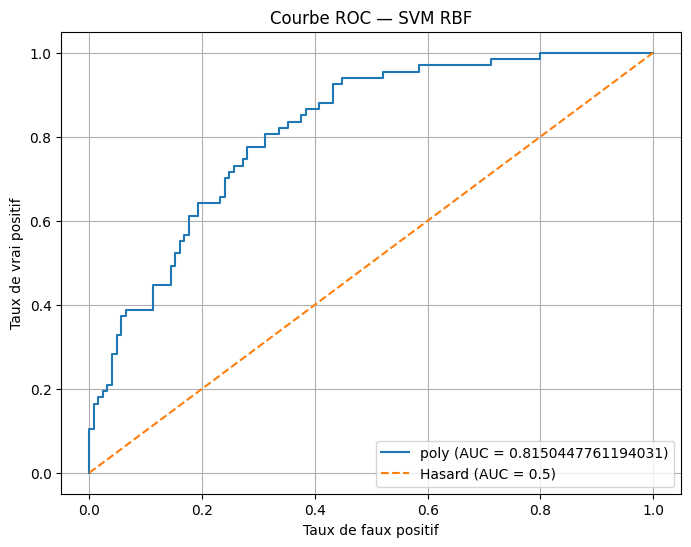

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(fpr_rbf, tpr_rbf, label=f"poly (AUC = {roc_auc_score(y_test, prediction_proba_rbf)})")
plt.plot([0,1], [0,1], "--", label="Hasard (AUC = 0.5)")

plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrai positif")
plt.title("Courbe ROC — SVM RBF")
plt.legend()
plt.grid(True)
plt.show()


le modèle continue à mieux prédire les cas non diabétiques (0) que les cas diabétiques (1).
Le score de rappel, en particulier, est presque deux fois plus élevé pour la classe 0, ce qui montre que le modèle identifie plus facilement les patients non diabétiques.
La précision est également légèrement supérieure pour les non diabetiques. Mais elle est quand meme eleve pour les diabetiques aussi

Enfin, le score ROC_AUC, indique que notre modèle arrive a faire beaucoup mieux que le hasard , notre courbe est bien au dessus de la ligne

Dans la globalite le modele a quand meme un nombre eleve de faux negatif indique que notre modele predit beaucoups de patients non diabetiques alors quils le sont ce qui est dangeureux

## MODELE POLYNOMIALE

### Optimisation (Grid Search) :

In [ ]:
param_grid_poly = {
    "kernel": ["poly"],
    "degree": [2, 3, 4],
    'C': [0.01, 0.1, 1, 10, 50, 100],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1]



}
temps_debut_grid_poly = time.time()
grid_search_poly = GridSearchCV(
    estimator=SVC( random_state=42),
    param_grid=param_grid_poly,
    scoring = "recall"

)

grid_search_poly.fit(X_train_normalise, y_train)
temps_fin_grid_poly = time.time()
temps_execution_grid_poly = temps_fin_grid_poly - temps_debut_grid_poly
meilleurs_parametres_poly = grid_search_poly.best_params_

In [ ]:
print("Meilleurs Hyperparamètres trouvés pour poly :")
print(meilleurs_parametres_poly)

Meilleurs Hyperparamètres trouvés pour poly :
{'C': 50, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}


### Entrainement du modele polynomial

In [ ]:
temps_debut_entrainement_poly = time.time()
modele_poly = SVC(kernel="poly",gamma=meilleurs_parametres_poly['gamma'], C=meilleurs_parametres_poly['C'],degree=meilleurs_parametres_poly['degree'],random_state=42)
modele_poly.fit(X_train_normalise,y_train)
temps_fin_entrainement_poly = time.time()
temps_execution_entrainement_poly = temps_fin_entrainement_poly - temps_debut_entrainement_poly

### Prediction du modele polynomial

In [ ]:
prediction_poly_normalise = modele_poly.predict(X_test_normalise)

In [ ]:
print("Resultat prediction poly normalisee")
print(prediction_poly_normalise)

Resultat prediction poly normalisee
[0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1
 1 1 0 0 0 0 0]


### Evaluation du modele poly

In [ ]:
matrice_confusion_poly = confusion_matrix(y_test, prediction_poly_normalise)
rapport_classification_poly = classification_report(y_test, prediction_poly_normalise)
prediction_proba_poly = modele_poly.decision_function(X_test_normalise)
score_roc_auc_poly = roc_auc_score(y_test, prediction_proba_poly)
score_precision_poly = precision_score(y_test, prediction_poly_normalise)
score_f1_poly = f1_score(y_test, prediction_poly_normalise)
score_recall_poly = recall_score(y_test, prediction_poly_normalise)
fpr_poly, tpr_poly, _ = roc_curve(y_test, prediction_proba_poly)

In [ ]:
print("Matrice de confusion :")
print(matrice_confusion_poly)
print("\n Rapport de classification :")
print(rapport_classification_poly)
print("\n score de precision:")
print(score_precision_poly)
print("\n score de recall :")
print(score_recall_poly)
print("\n score de f1 :")
print(score_f1_poly)
print("\n Score ROC AUC :")
print(score_roc_auc_poly)
print("\n Temps d'execution de la recherche :")
print(temps_execution_grid_poly)
print("\n Temps d'execution de la l'entrainement :")
print(temps_execution_entrainement_poly)

Matrice de confusion :
[[100  25]
 [ 37  30]]

 Rapport de classification :
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       125
           1       0.55      0.45      0.49        67

    accuracy                           0.68       192
   macro avg       0.64      0.62      0.63       192
weighted avg       0.67      0.68      0.67       192


 score de precision:
0.5454545454545454

 score de recall :
0.44776119402985076

 score de f1 :
0.4918032786885246

 Score ROC AUC :
0.7035223880597016

 Temps d'execution de la recherche :
725.5611727237701

 Temps d'execution de la l'entrainement :
65.92579579353333


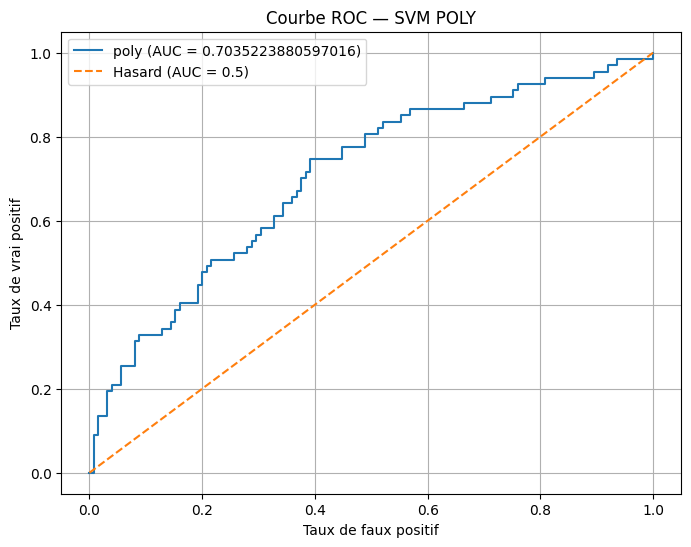

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(fpr_poly, tpr_poly, label=f"poly (AUC = {roc_auc_score(y_test, prediction_proba_poly)})")
plt.plot([0,1], [0,1], "--", label="Hasard (AUC = 0.5)")

plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrai positif")
plt.title("Courbe ROC — SVM POLY")
plt.legend()
plt.grid(True)
plt.show()

Le modele polynomial en terme de precision fait le meme nombre que le rbf mais son score recall et f1 sont plus faible ,le modele fait plus de faux negatifs ainsi que plus de faux positif, notre modele poly rates plus de vrais diabetiques et aussi donnes d'avantages de faux diagostiques positifs. cela joue sur son score ROC AUC qui est plus faible

## Conclusion

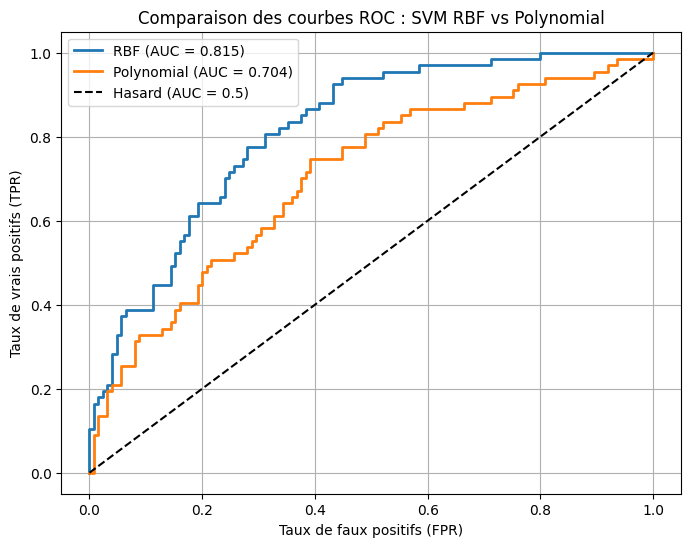

/n


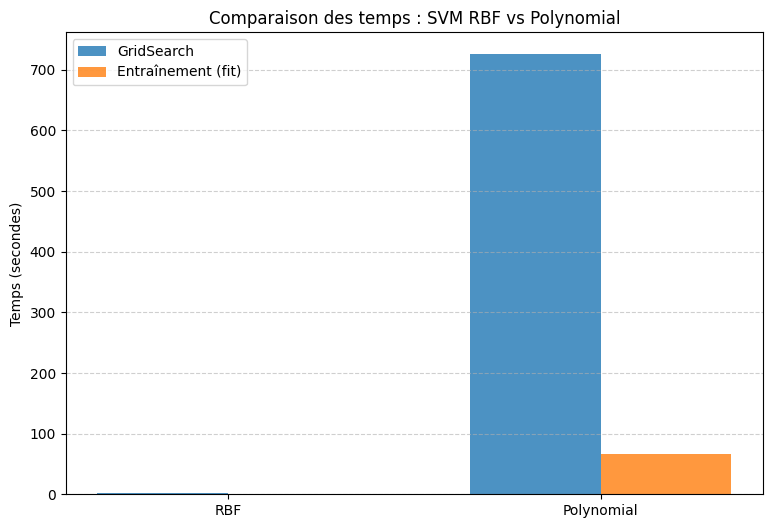

In [ ]:
plt.figure(figsize=(8,6))


plt.plot(fpr_rbf, tpr_rbf,
         label=f"RBF (AUC = {score_roc_auc_rbf:.3f})",
         linewidth=2)


plt.plot(fpr_poly, tpr_poly,
         label=f"Polynomial (AUC = {score_roc_auc_poly:.3f})",
         linewidth=2)


plt.plot([0, 1], [0, 1], 'k--', label="Hasard (AUC = 0.5)")

plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Comparaison des courbes ROC : SVM RBF vs Polynomial")
plt.legend()
plt.grid(True)
plt.show()

print("/n")

temps_gs = [temps_execution_grid_rbf, temps_execution_grid_poly]
temps_fit = [temps_execution_entrainement_rbf, temps_execution_entrainement_poly]

labels = ['RBF', 'Polynomial']

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(9,6))


plt.bar(x - width/2, temps_gs, width, label='GridSearch', alpha=0.8)


plt.bar(x + width/2, temps_fit, width, label='Entraînement (fit)', alpha=0.8)

plt.ylabel('Temps (secondes)')
plt.title('Comparaison des temps : SVM RBF vs Polynomial')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.show()

Le GridSearch du modèle Polynomial est nettement plus lent, et malgré ce temps d’exécution beaucoup plus élevé, ses performances restent inférieures à celles du modèle RBF.
De plus, l’entraînement du modèle Polynomial lui-même est également plus lent, ce qui confirme que ce kernel est plus coûteux en calcul tout en offrant des résultats moins satisfaisants.
Pour notre cas d'utilisation, le modele polynomial est bien moins performant et beaucoup plus lent